In [16]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [17]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [18]:
from __future__ import print_function
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2


In [19]:
import albumentations

In [20]:
import dataloader

In [21]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [22]:
import Resnet

In [23]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [24]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.Resize((28, 28)),
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       #transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.RandomErasing(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

Files already downloaded and verified


In [25]:
import Train

plane   dog  deer  deer


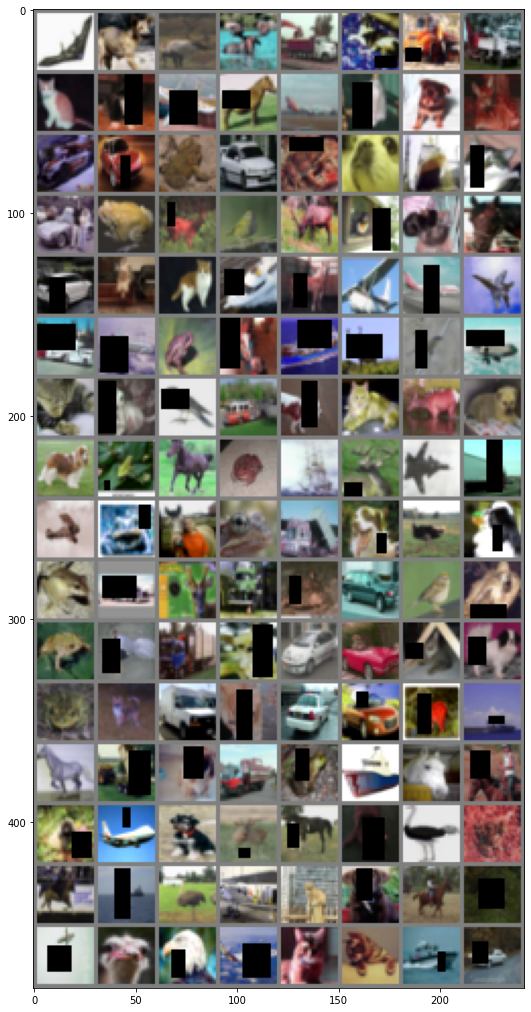

In [26]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(32,18))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
from torch.optim.lr_scheduler import StepLR

model =  Resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Train.train(model, device, train_loader, optimizer, epoch)
    Train.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


loss=1.1725873947143555 batch_id=390 Accuracy=45.37: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.9036, Accuracy: 3862/10000 (39%)

EPOCH: 1


loss=0.8896315693855286 batch_id=390 Accuracy=63.51: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3047, Accuracy: 5593/10000 (56%)

EPOCH: 2


loss=0.9597074389457703 batch_id=390 Accuracy=71.38: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1469, Accuracy: 6083/10000 (61%)

EPOCH: 3


loss=0.6227811574935913 batch_id=390 Accuracy=75.89: 100%|██████████| 391/391 [02:29<00:00,  2.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 2.0023, Accuracy: 4482/10000 (45%)

EPOCH: 4


loss=0.514122724533081 batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8987, Accuracy: 6944/10000 (69%)

EPOCH: 5


loss=0.6150123476982117 batch_id=390 Accuracy=81.19: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0432, Accuracy: 6639/10000 (66%)

EPOCH: 6


loss=0.5151317119598389 batch_id=390 Accuracy=82.94: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9887, Accuracy: 6804/10000 (68%)

EPOCH: 7


loss=0.6454828977584839 batch_id=390 Accuracy=84.92: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8911, Accuracy: 7189/10000 (72%)

EPOCH: 8


loss=0.28935784101486206 batch_id=390 Accuracy=85.82: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1529, Accuracy: 6442/10000 (64%)

EPOCH: 9


loss=0.3508164882659912 batch_id=390 Accuracy=87.24: 100%|██████████| 391/391 [02:27<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0875, Accuracy: 6647/10000 (66%)

EPOCH: 10


loss=0.21029067039489746 batch_id=390 Accuracy=88.27: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9287, Accuracy: 7143/10000 (71%)

EPOCH: 11


loss=0.3351714611053467 batch_id=390 Accuracy=89.29: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9714, Accuracy: 7055/10000 (71%)

EPOCH: 12


loss=0.3621699810028076 batch_id=390 Accuracy=90.18: 100%|██████████| 391/391 [02:27<00:00,  2.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2614, Accuracy: 6489/10000 (65%)

EPOCH: 13


loss=0.2675061523914337 batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0312, Accuracy: 7242/10000 (72%)

EPOCH: 14


loss=0.28418153524398804 batch_id=390 Accuracy=91.74: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3310, Accuracy: 6637/10000 (66%)

EPOCH: 15


loss=0.26039355993270874 batch_id=390 Accuracy=92.16: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1979, Accuracy: 6894/10000 (69%)

EPOCH: 16


loss=0.12259868532419205 batch_id=390 Accuracy=92.55: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1601, Accuracy: 6787/10000 (68%)

EPOCH: 17


loss=0.23253771662712097 batch_id=390 Accuracy=93.21: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0584, Accuracy: 6968/10000 (70%)

EPOCH: 18


loss=0.13256199657917023 batch_id=390 Accuracy=93.61: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9110, Accuracy: 7438/10000 (74%)

EPOCH: 19


loss=0.07254323363304138 batch_id=390 Accuracy=94.06: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.5085, Accuracy: 6606/10000 (66%)

EPOCH: 20


loss=0.16570131480693817 batch_id=390 Accuracy=94.34: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1710, Accuracy: 7081/10000 (71%)

EPOCH: 21


loss=0.0882081687450409 batch_id=390 Accuracy=94.85: 100%|██████████| 391/391 [02:29<00:00,  2.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9419, Accuracy: 7536/10000 (75%)

EPOCH: 22


loss=0.1790977120399475 batch_id=390 Accuracy=94.84: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0547, Accuracy: 7251/10000 (73%)

EPOCH: 23


loss=0.1473812460899353 batch_id=390 Accuracy=95.36: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2244, Accuracy: 7014/10000 (70%)

EPOCH: 24


loss=0.15155574679374695 batch_id=390 Accuracy=95.57: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]



Test set: Average loss: 1.1648, Accuracy: 7116/10000 (71%)



In [47]:
import gradcam

In [49]:
def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    cv2.imwrite("cam.jpg", np.uint8(255 * cam))


In [48]:
import cv2
img = cv2.imread('./data/Elephant/data/05fig34.jpg')
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./map.jpg', superimposed_img)

NameError: ignored

In [50]:
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse   dog plane  deer


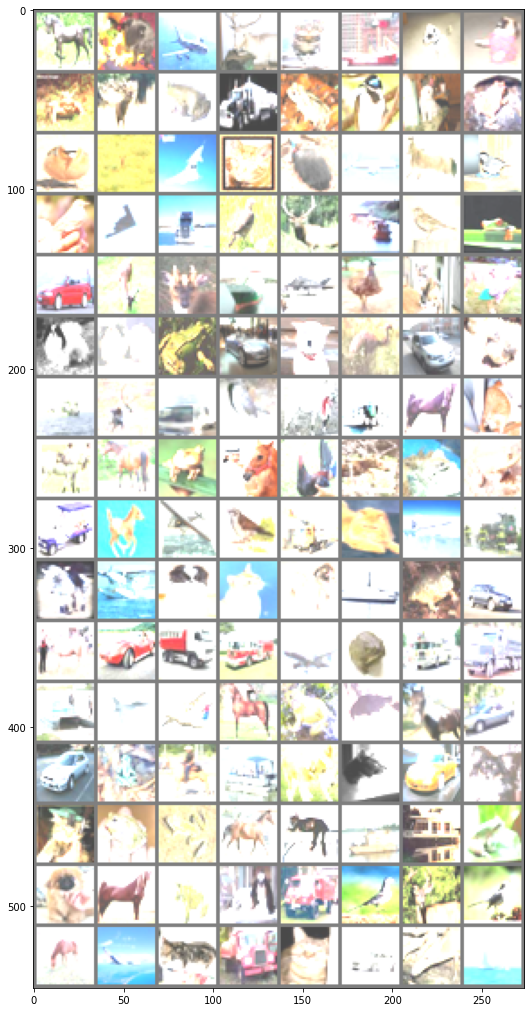

In [51]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

IndexError: ignored

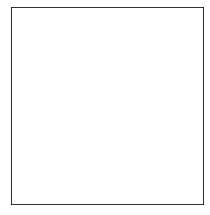

In [52]:
fig = plt.figure(figsize=(20, 8))

for idx in np.arange(0,10):
  ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
#std = np.array([0.229, 0.224, 0.225])
#mean = np.array([0.485, 0.456, 0.406])
  img = incorrect_examples[idx][idx]
  img = img/2 + 0.5
  img = np.clip(img, 0, 1)
  imshow(img)
  ax.set_title(f"{classes[pred[idx]]}: x%\n (label: {classes[target[idx]]})",
  color= ('green' if pred[idx]==target[idx].item() else 'red'))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")